<a href="https://colab.research.google.com/github/RPFey/XJTU_NEW/blob/main/%E5%9D%90%E6%A0%87%E7%B3%BB%E5%8F%98%E6%8D%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 坐标系变换

<img src="https://drive.google.com/uc?export=view&id=1N90gfgCycjdqF6CxatU1LNFLzHom2a2R" style="height:300px">

坐标系变换最简单的表示形式是：

$$
p_1 = R_2^1 p_2 + T
$$

$R_2^1$ 代表从坐标系2变换到坐标系1。

## 确定 R, T

* 确定 T

向量 $T$ 为坐标系 2 的原点在坐标系 1 中的坐标。可以令 $p_2 = \vec{0}$，也就是坐标系 2 的原点，此时 $p_1 = T$。

* 确定 R

令两坐标系原点重合。

$$
R_2^1 = \begin{bmatrix} r_x' & r_y' & r_z' \end{bmatrix}
$$

$r_x'$ 为坐标系 2 的 $x$ 轴在坐标系 1 中的坐标。

$$
r_x' = \begin{bmatrix} e_x'^T e_x \\ e_x'^Te_y \\ e_x'^Te_z \end{bmatrix}
$$

因此

$$
\begin{bmatrix} e_x' & e_y' & e_z' \end{bmatrix} = \begin{bmatrix} e_x & e_y & e_z \end{bmatrix} R_2^1
$$

可以将坐标系变换理解成基底变换。对于空间中任一向量 $p$

$$
p = \begin{bmatrix} e_x & e_y & e_z \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} e_x' & e_y' & e_z' \end{bmatrix} \begin{bmatrix} x_1' \\ x_2' \\ x_3' \end{bmatrix} 
$$

$$
\begin{bmatrix} e_x & e_y & e_z \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} e_x & e_y & e_z \end{bmatrix} R_2^1 \begin{bmatrix} x_1' \\ x_2' \\ x_3' \end{bmatrix}
$$

$$
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = R_2^1 \begin{bmatrix} x_1' \\ x_2' \\ x_3' \end{bmatrix}
$$

## 表示坐标变换的四种形式

* R, T 矩阵表示形式

* 欧拉角

Play with this interactive [figure](http://www.ctralie.com/Teaching/COMPSCI290/Materials/EulerAnglesViz/)

Video available at https://youtube.com/watch?v=qqlLshaHqeE


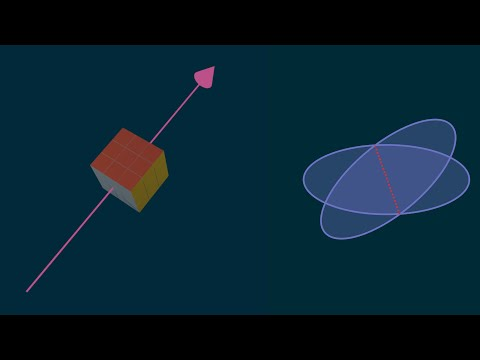

In [ ]:
#@title 视频: 欧拉角
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="qqlLshaHqeE", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

* 欧拉角与旋转矩阵

$$
p = R_xR_yR_zp'
$$

其中 $R_x(\theta)=\begin{bmatrix} 1 & 0 & 0 \\ 0 & cos\theta & -sin\theta \\ 0 & sin\theta & cos\theta \end{bmatrix}$，$R_y(\phi)=\begin{bmatrix} cos\phi & 0 & sin\phi \\ 0 & 1 & 0 \\ -sin\phi & 0 & cos\phi \end{bmatrix}$，$R_z(\gamma)=\begin{bmatrix} cos\gamma & -sin\gamma & 0 \\ sin\gamma & cos\gamma & 0 \\ 0 & 0 & 1 \end{bmatrix}$

旋转矩阵到欧拉角只需要乘起来然后凑角度即可。

In [4]:
# 这里我们使用 scipy 中的类演示变换
# 具体文档参考 https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html#scipy.spatial.transform.Rotation
from scipy.spatial.transform import Rotation as R
import numpy as np

# 假设绕着 z 轴旋转 45 度
rot = R.from_euler('z', [45], degrees=True)
print("Rotation Matrix : \n", rot.as_matrix())

# 给定一个旋转矩阵
rot = R.from_matrix([[0, -1, 0],
          [1, 0, 0],
          [0, 0, 1]])
print("Euler Angle: \n", rot.as_euler('xyz'))

Rotation Matrix : 
 [[[ 0.70710678 -0.70710678  0.        ]
  [ 0.70710678  0.70710678  0.        ]
  [ 0.          0.          1.        ]]]
Euler Angle: 
 [0.         0.         1.57079633]


* 旋转向量与旋转矩阵

旋转向量 $\vec{a}$。其中$\vec{a}$的模就是转角，$||\vec{a}||=\theta$。而$vec{a}$的方向就是转轴。$\vec{n} = \frac{\vec{a}}{||\vec{a}||}$。

从旋转向量到旋转矩阵（罗德里格斯公式）

$$
R = I + sin\theta K+ (1-cos\theta)K^2
$$

> 还记得 K 是什么吗？

从旋转矩阵到旋转向量。

由于$R\vec{n}=\vec{n}$，所以$\vec{n}$是R的特征值为1的特征向量。

对罗德里格斯公式两边求迹，有

$$
tr(R) = 3 - 2(1-cos\theta)
$$

可以求得 $\theta$

In [5]:
# 还是用欧拉角，很明显是绕着 z 转 45 度
rot = R.from_euler('z', [45], degrees=True)
print("Rotation vector : \n", rot.as_rotvec())

Rotation vector : 
 [[0.         0.         0.78539816]]


* 旋转向量和四元数

单位四元数和旋转向量的关系

$$
\vec{q} = (cos\frac{\theta}{2}, \vec{n}sin\frac{\theta}{2})
$$

> 四元数是 $(w, x, y, z)$ 形式

In [6]:
# 将上一个旋转用四元数形式表示
# 注意这里的表示形式是 (x, y, z, w)
print("Quaternion vector : \n", rot.as_quat())

Rotation vector : 
 [[0.         0.         0.38268343 0.92387953]]


# Exercise

假设同学为了检查无人机的定位系统是否正确，在将飞控板上电后，他手持无人机绕 z 轴逆时针旋转 90 度。如果配置正确，系统输出的四元数是多少？（假设初始时四元数是 (1, 0, 0, 0)，四元数格式是 (w, x, y, z)）

还记得我们讲座中提到的无人机结构吗？

![](https://drive.google.com/uc?export=view&id=1LmOjK6mSwBuKUacnWgmRQtDVOQVqMq_9)

1. 求出从飞机坐标系（body frame）到相机坐标系（camera frame）的 R, T。即

$$
p_b = Rp_c + T
$$

$p_b$ 为飞机坐标系中坐标，$p_c$ 为相机坐标系中坐标。

2. 请填写配置文件，配置文件要求格式是 (r, p, y, x, y, z) （注意前后两个 y 的含义不同哦。）

3. 为了检测相机目标是否准确。现在在飞机前方 3m 的地上放置一个目标物。飞机在地面上 1 m。目标物在相机坐标系中的坐标是多少？

**允许编程求解，鼓励手算**

In [ ]:
# 求出 R, T
R = ...
T = ...

# 构建 Rotation 类
rot = R.from_matrix(...)

# 求出欧拉角
...

# 写出地面上点的坐标
x = ...
# 求出相机中点的坐标
c = ...